## Regresion Logistica Binomial

### Paso 1: Librerías

In [2]:
##Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###Machine learning


##Hiperparametrización

### Paso 2: Importar Dataset

In [3]:
data = '../5.RegresionLogistica/Dataset/weatherAUS.csv'

df = pd.read_csv(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
##Extraer los encabezados del dataframe
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
##Categóricas y numéricas
categoricas = [i for i in df.columns if df[i].dtype=='O']

print('Hay {} variables de tipo categórico'.format(len(categoricas)))

print('Las variables categóricas son:', categoricas)

Hay 7 variables de tipo categórico
Las variables categóricas son: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [6]:
df[categoricas].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [7]:
##Datos NAN de las columnas categóricas
df[categoricas].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [8]:
##Sacar los conteos de datos NAN sin los valores de cero
cat1 = [i for i in categoricas if df[i].isnull().sum()!= 0]
print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


In [9]:
##Revisar las etiquetas u opciones de las variables
for i in categoricas:
    print(i, 'contiene', len(df[i].unique()),'Etiquetas')

Date contiene 3436 Etiquetas
Location contiene 49 Etiquetas
WindGustDir contiene 17 Etiquetas
WindDir9am contiene 17 Etiquetas
WindDir3pm contiene 17 Etiquetas
RainToday contiene 3 Etiquetas
RainTomorrow contiene 3 Etiquetas


### Limpieza

In [10]:
##categorica la fecha - Date
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
###Extraer el año a una columna
df['Year'] = df['Date'].dt.year

df['Year']

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145455    2017
145456    2017
145457    2017
145458    2017
145459    2017
Name: Year, Length: 145460, dtype: int64

In [12]:
###Extracción de mes
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [13]:
###Extracción de dia
df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [14]:
##Eliminar la fecha normal
df.drop('Date', axis=1, inplace=True)

In [15]:
###Variables dummies y exploración de la columna Location
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

#### **Tarea 1: Agregar las variables dummies al df original y eliminar la columna de base**

In [16]:
##Variables dummies de Location
#df2 = df
pd.get_dummies(df.Location, drop_first=True)

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
##Viento - np.where(df['WindGustDir']=='ENE', 'NE', df['WindGustDir']) - apply - lapply
pd.get_dummies(df['WindGustDir'], drop_first=True, dummy_na=True)
##N S E W - NW ,NE, SE, SW 

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
145457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [18]:
##Viento 9 am
pd.get_dummies(df['WindDir9am'], drop_first=True, dummy_na=True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
##Viento 3 pm
pd.get_dummies(df['WindDir3pm'], drop_first=True, dummy_na=True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
145458,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
##Rain today y rain tomorrow
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [21]:
pd.get_dummies(df['RainToday'], drop_first=True, dummy_na=True)

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [22]:
###Filtro para variables numéricas
numericas = [i for i in df.columns if df[i].dtype!='O']

print('Hay {} variables de tipo Numéricas'.format(len(numericas)))

print('Las variables Numéricas son:', numericas)

Hay 19 variables de tipo Numéricas
Las variables Numéricas son: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [23]:
df[numericas].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

Text(0, 0.5, 'Cant Viento 3pm')

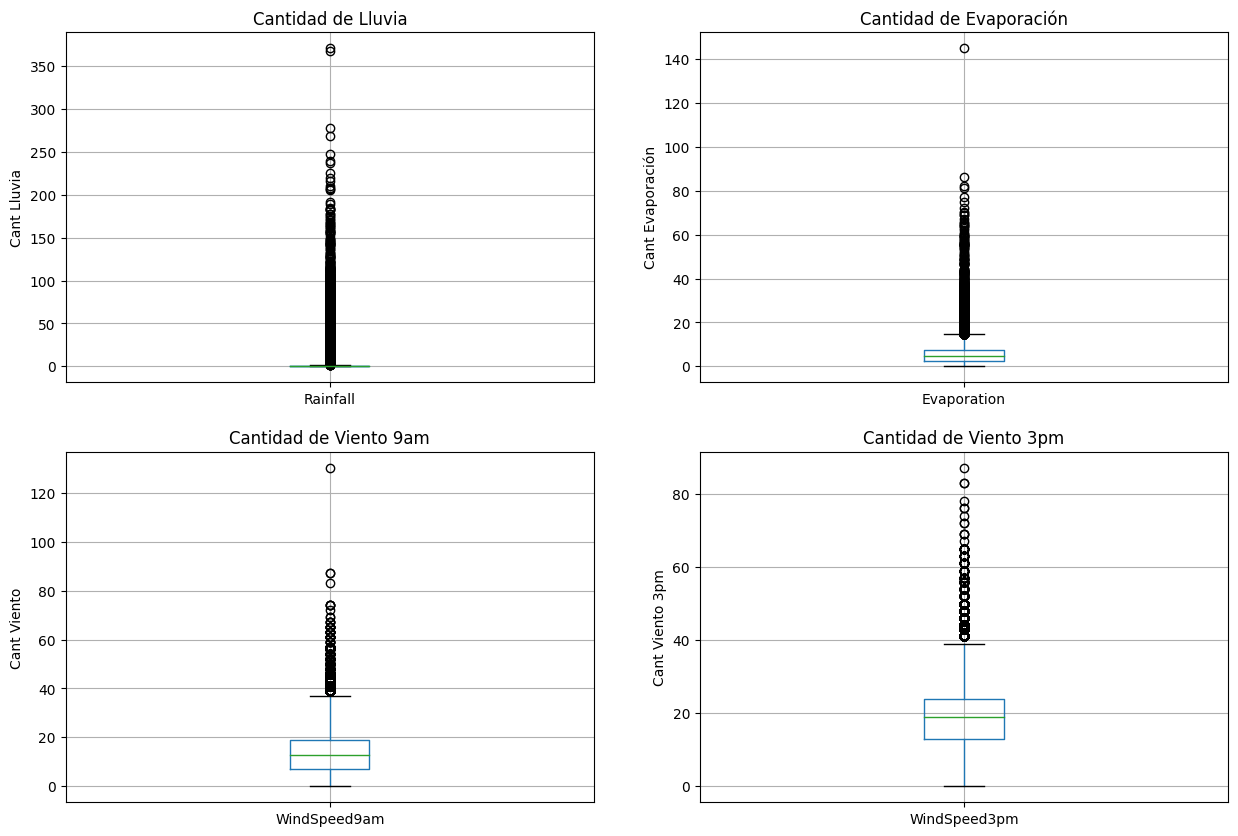

In [24]:
##Grafica para ver el ruido en los datos
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('Cantidad de Lluvia')
fig.set_ylabel('Cant Lluvia')

plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('Cantidad de Evaporación')
fig.set_ylabel('Cant Evaporación')

plt.subplot(2,2,3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('Cantidad de Viento 9am')
fig.set_ylabel('Cant Viento')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('Cantidad de Viento 3pm')
fig.set_ylabel('Cant Viento 3pm')

Text(0, 0.5, 'Llover Mañana')

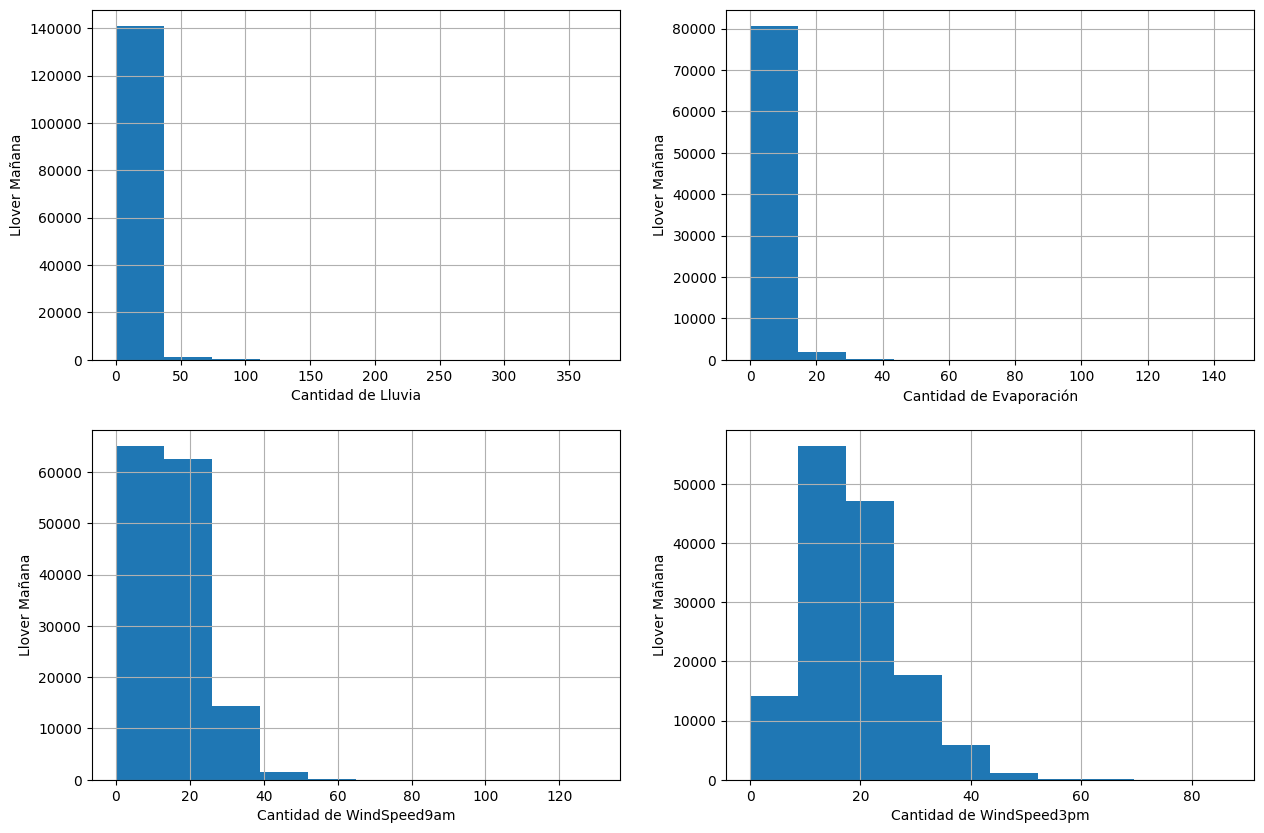

In [25]:
##Ver distribución de variables
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Cantidad de Lluvia')
fig.set_ylabel('Llover Mañana')

plt.subplot(2,2,2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Cantidad de Evaporación')
fig.set_ylabel('Llover Mañana')

plt.subplot(2,2,3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('Cantidad de WindSpeed9am')
fig.set_ylabel('Llover Mañana')


plt.subplot(2,2,4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('Cantidad de WindSpeed3pm')
fig.set_ylabel('Llover Mañana')

In [26]:
##Rango del ruido de esas variable numéricas - rango intercuantilico
IQR1 = df.Rainfall.quantile(0.75)- df.Rainfall.quantile(0.25)
puntomin = df.Rainfall.quantile(0.25) - (IQR1*3)
puntomax = df.Rainfall.quantile(0.75) + (IQR1*3)

print('Rainfall el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR1)
##El ruido arranca desde >3.2

Rainfall el ruido esta entre los valores -2.4000000000000004 y 3.2
El rango IQR es: 0.8


In [27]:
IQR2 = df.Evaporation.quantile(0.75)- df.Evaporation.quantile(0.25)
puntomin = df.Evaporation.quantile(0.25) - (IQR2*3)
puntomax = df.Evaporation.quantile(0.75) + (IQR2*3)

print('Evaporation el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR2)

Evaporation el ruido esta entre los valores -11.800000000000002 y 21.800000000000004
El rango IQR es: 4.800000000000001


In [28]:
IQR3 = df.WindSpeed9am.quantile(0.75)- df.WindSpeed9am.quantile(0.25)
puntomin = df.WindSpeed9am.quantile(0.25) - (IQR3*3)
puntomax = df.WindSpeed9am.quantile(0.75) + (IQR3*3)

print('WindSpeed9am el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR3)

WindSpeed9am el ruido esta entre los valores -29.0 y 55.0
El rango IQR es: 12.0


In [29]:
IQR4 = df.WindSpeed3pm.quantile(0.75)- df.WindSpeed3pm.quantile(0.25)
puntomin = df.WindSpeed3pm.quantile(0.25) - (IQR4*3)
puntomax = df.WindSpeed3pm.quantile(0.75) + (IQR4*3)

##df['Age'] = np.where(df['Age']>57.0,IQR,df['Age'] )

print('WindSpeed3pm el ruido esta entre los valores {} y {}'.format(puntomin, puntomax))
print('El rango IQR es:', IQR4)

WindSpeed3pm el ruido esta entre los valores -20.0 y 57.0
El rango IQR es: 11.0


#### **Tarea 2: Eliminar el ruido en las variables numéricas**

In [30]:
##Particiones X y
X= df.drop(['RainTomorrow'], axis=1)
y= df['RainTomorrow']

In [31]:
##Particiones X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [32]:
###Filtros
categoricos = [i for i in X_train.columns if X_train[i].dtype=='O']

categoricos

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [33]:
numericos = [i for i in X_train.columns if X_train[i].dtype!='O']

numericos

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [34]:
##For gomelo doble para limpieza de datos
for df1 in [X_train, X_test]:
    for col in numericos:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [35]:
##For gomelo Dos para categóricos
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

#### **Tarea 3: Hacer limpieza de moda para categóricos con doble for**

In [36]:
### Rain today - Category encoders - pip install category_encoders
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.fit_transform(X_test)

X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
111548,Albany,14.5,17.8,14.2,4.8,8.4,W,39.0,N,SE,...,1022.5,8.0,5.0,16.2,21.1,0,1,2017,4,24
142528,Katherine,24.6,39.5,0.0,12.0,8.4,SE,31.0,N,NW,...,1006.6,2.0,4.0,30.1,39.2,1,0,2013,10,11
65304,MelbourneAirport,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,S,...,1015.4,7.0,3.0,17.3,24.5,1,0,2012,2,18
40651,Williamtown,18.3,26.6,0.0,4.8,8.4,SE,28.0,WSW,SSE,...,1016.5,6.0,5.0,23.0,25.4,1,0,2012,2,18
97487,Adelaide,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,SSW,...,1017.1,5.0,5.0,14.4,18.3,1,0,2011,10,11


In [37]:
X_train = pd.concat([X_train[numericos], X_train[['RainToday_0','RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [38]:
X_test = pd.concat([X_test[numericos], X_test[['RainToday_0','RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [39]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.195085,23.214229,2.325638,5.177513,7.991327,39.963031,14.039427,18.670597,68.927927,51.564992,...,0.053657,0.059518,0.068232,0.103757,0.065009,0.055608,0.064451,0.069443,0.061220,0.065473
std,6.367295,7.087178,8.448650,3.177739,2.755849,13.144589,8.865300,8.725620,18.842219,20.458995,...,0.225341,0.236593,0.252144,0.304946,0.246543,0.229164,0.245555,0.254208,0.239734,0.247360
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.200000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
###Normalizar
columnas = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)



In [41]:
##Agregar nombres de columnas
X_train = pd.DataFrame(X_train, columns=[columnas])
X_test = pd.DataFrame(X_test, columns=[columnas])

In [42]:
##Agregar métricas
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,...,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000
mean,0.481621,0.519747,0.006087,0.075419,0.558331,0.257491,0.160874,0.252249,0.684793,0.510172,...,0.055892,0.057885,0.068266,0.102846,0.063041,0.057920,0.063729,0.069744,0.060154,0.065276
std,0.151785,0.136934,0.022170,0.046267,0.193397,0.101766,0.101699,0.117313,0.190988,0.207282,...,0.229716,0.233530,0.252206,0.303763,0.243042,0.233596,0.244274,0.254720,0.237776,0.247016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372315,0.418919,0.000000,0.058140,0.573427,0.187500,0.080460,0.175676,0.565657,0.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.477327,0.507722,0.000000,0.069767,0.587413,0.250000,0.149425,0.256757,0.696970,0.515152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.591885,0.615830,0.001632,0.078488,0.608392,0.304688,0.218391,0.324324,0.828283,0.646465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
###Revisión de Y - y_train, y_test
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_test.mode()[0], inplace=True)

#### Modelo Uno 

In [44]:
from sklearn.linear_model import LogisticRegression

reglog1 = LogisticRegression(solver='liblinear', random_state=42)

reglog1.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [45]:
y_pred_test = reglog1.predict(X_test)

y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [46]:
##Probabilidad de que no llueva mañana corresponde a cero 
reglog1.predict_proba(X_test)[:,0]

array([0.38952788, 0.98760259, 0.8109029 , ..., 0.89445386, 0.77812388,
       0.86723956])

In [47]:
##Probabilidad de que llueva mañana corresponde a uno
reglog1.predict_proba(X_test)[:,1]

array([0.61047212, 0.01239741, 0.1890971 , ..., 0.10554614, 0.22187612,
       0.13276044])

In [48]:
###Eficiencia del modelo con testeo
from sklearn.metrics import accuracy_score

print("La eficiencia del modelo de manera general es: {0:0.4f}".format(accuracy_score(y_test, y_pred_test)))

La eficiencia del modelo de manera general es: 0.8429


In [49]:
y_pred_train = reglog1.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [50]:
print("La eficiencia del modelo de manera general es: {0:0.4f}".format(accuracy_score(y_train, y_pred_train)))

La eficiencia del modelo de manera general es: 0.8489


In [51]:
reglog2 = LogisticRegression(C=100 ,solver='liblinear', random_state=42)

reglog2.fit(X_train, y_train)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [52]:
print("La eficiencia del modelo de manera general es C100: {:.4f}".format(reglog2.score(X_train, y_train)))
print("La eficiencia del modelo de manera general es C100: {:.4f}".format(reglog2.score(X_test, y_test)))

La eficiencia del modelo de manera general es C100: 0.8489
La eficiencia del modelo de manera general es C100: 0.8425


In [53]:
##Métricas - Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

print('Matriz de confusión\n\n', cm)

print('True Positives (TP)=', cm[0,0])
print('True Negatives (TN)=', cm[1,1])
print('False Positives (FP)=', cm[0,1])
print('False Negatives (FN)=', cm[1,0])

Matriz de confusión

 [[21894   778]
 [ 3792  2628]]
True Positives (TP)= 21894
True Negatives (TN)= 2628
False Positives (FP)= 778
False Negatives (FN)= 3792


In [54]:
(21894+2628)/29092


0.8429121407947202

In [55]:
(778+3792)/29092

0.1570878592052798

<Axes: >

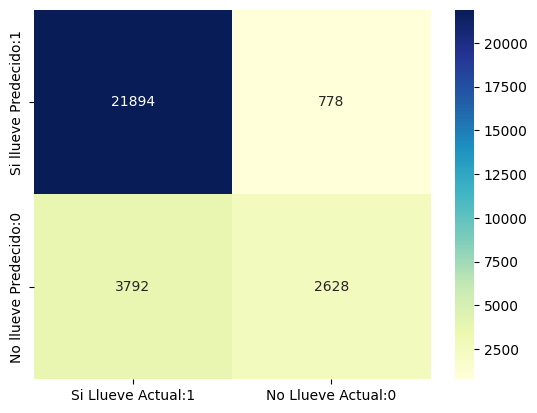

In [56]:
##Hacer la gráfica a petición de Sergio :D
cm_matrix = pd.DataFrame(data=cm, columns=['Si Llueve Actual:1','No Llueve Actual:0'],
                         index=['Si llueve Predecido:1','No llueve Predecido:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.85      0.97      0.91     22672
         Yes       0.77      0.41      0.53      6420

    accuracy                           0.84     29092
   macro avg       0.81      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



In [58]:
###Probabilidades de las primeras 10 filas de llueva mañana o no
y_pred_prob = reglog1.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.38952788, 0.61047212],
       [0.98760259, 0.01239741],
       [0.8109029 , 0.1890971 ],
       [0.92104163, 0.07895837],
       [0.57923745, 0.42076255],
       [0.95499626, 0.04500374],
       [0.97900888, 0.02099112],
       [0.75663965, 0.24336035],
       [0.81150474, 0.18849526],
       [0.57986926, 0.42013074]])

In [59]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob No Llueva (0)', 'Prob Llueva (1)'])

y_pred_prob_df

,Prob No Llueva (0),Prob Llueva (1)
0,0.389528,0.610472
1,0.987603,0.012397
2,0.810903,0.189097
3,0.921042,0.078958
4,0.579237,0.420763
5,0.954996,0.045004
6,0.979009,0.020991
7,0.756640,0.243360
8,0.811505,0.188495
9,0.579869,0.420131


In [60]:
###Grafica ROC - AUC

y_pred1 = reglog1.predict_proba(X_test)[:,1]

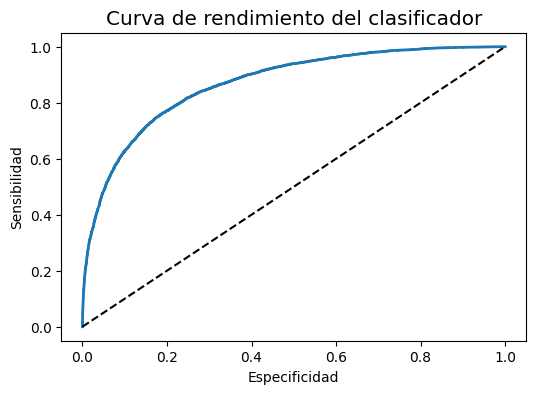

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1],[0,1], 'k--')

plt.rcParams['font.size']=12

plt.title('Curva de rendimiento del clasificador')

plt.xlabel('Especificidad')

plt.ylabel('Sensibilidad')

plt.show()

In [62]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred1)

roc_auc

0.8678621522808267

#### Hiperparamentrización GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

parametros = [{'penalty':['l1','l2']},
              {'C':[1, 10,100,1000]}]

gridsearch = GridSearchCV(estimator=reglog1,
                          param_grid=parametros,
                          scoring='accuracy',
                          cv=5,
                          verbose=0)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [64]:
print('GridSearchCV Score: {:.4f}'.format(gridsearch.best_score_))

print('Parámetros:', gridsearch.best_params_)

print('Estimador:', gridsearch.best_estimator_)

LogisticRegression(penalty='l2', random_state=42, solver='liblinear')

GridSearchCV Score: 0.8485
Parámetros: {'penalty': 'l2'}
Estimador: LogisticRegression(random_state=42, solver='liblinear')


LogisticRegression(random_state=42, solver='liblinear')

In [65]:
df.to_csv('clima.csv', index=False)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null